# Prediction of Parameters Based on Time Series Data for Road Sensors

## Importing Libraries for Preprocessing

In [274]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date


## Reading the Data

In [275]:
df=pd.read_excel("dataset.xlsx",header=None)
df1=pd.read_excel("dataset.xlsx")

ls=[]
for i in range(0,len(df),10):
    df_temp=pd.DataFrame(columns=df1.columns)
    j=1
    #print(j,df.iloc[i+j,1])
    while(j==df.iloc[i+j,1]):
        df_temp.loc[len(df_temp)]=df.iloc[i+j,:].values
        j+=1
    while(i+j-1<len(df) and j==df.iloc[i+j-1,1]):
        df_temp.loc[len(df_temp)]=df.iloc[i+j-1,:].values
        j+=1
    j=1
    ls.append(df_temp)
    

C:\Users\jasy9\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\jasy9\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\jasy9\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\jasy9\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


## Seperating Data for Each Section

In [276]:
X=[]
Y=[]
j=1
for i in ls:
    #print(len(i))
    if len(i)==9:
        x=len(i.index)-1
        y=i.loc[len(i.index)-1]
        i.loc[len(i.index)-1] =i.mean()
        i.iloc[x,1]=10
        i.loc[len(i.index)]=y
    i.iloc[:,0]=j
    #for z in range(len(i)):
    #    i.iloc[z,1]=int((date.today() + timedelta(days=i.iloc[z,1])).strftime("%Y%m%d"))
    j+=1
    X.append(i.iloc[:,1:].astype(float))
    Y.append(i.iloc[:,10])

C:\Users\jasy9\AppData\Local\Temp/ipykernel_23488/2484345839.py:12: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  i.iloc[:,0]=j
C:\Users\jasy9\AppData\Local\Temp/ipykernel_23488/2484345839.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  i.loc[len(i.index)-1] =i.mean()
C:\Users\jasy9\AppData\Local\Temp/ipykernel_23488/2484345839.py:12: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newva

In [277]:
X[0]

,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,1.0,324.0,354.5,17.0,0.0,3.0,117.0,2600.0,400.0,0.0,0.0,0.0,0.0,1.52
1,2.0,324.0,161.1,18.2,0.0,4.0,106.0,5950.0,1190.0,0.0,3.4,0.0,0.0,1.62
2,3.0,324.0,170.7,18.5,0.0,4.0,110.0,5950.0,1190.0,0.0,21.3,0.0,4.0,1.68
3,4.0,324.0,223.9,18.9,0.0,3.0,110.0,6150.0,1340.0,0.0,21.3,0.0,5.0,1.78
4,5.0,324.0,228.2,18.4,0.0,2.0,113.0,6340.0,1450.0,0.0,23.9,0.0,7.0,1.80
5,6.0,324.0,225.0,17.2,0.0,4.0,114.0,6630.0,1500.0,0.0,24.9,0.0,7.0,1.81
6,7.0,324.0,130.0,18.4,0.0,3.0,103.0,6700.0,1540.0,0.9,25.2,0.0,7.0,1.86
7,8.0,324.0,100.6,19.0,0.0,2.0,114.0,6740.0,1590.0,0.9,52.8,0.0,8.0,1.89
8,9.0,324.0,176.5,19.0,0.0,3.0,108.0,7175.0,1787.0,3.4,60.5,57.0,8.0,1.92
9,10.0,324.0,53.6,19.0,0.0,2.0,105.0,7567.0,1885.0,16.8,105.0,65.0,9.0,1.96


## Importing Regression Models

In [278]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## Applying Regeression Model on Each Section.

In [279]:
pred=[]
act=[]
for i in X:
    i=i.fillna(0)
    pred1=[]
    act1=[]
    scaler=StandardScaler()
    # for para 9
    dfrenamed=i.rename(columns={'year':'ds','Para-9':'y'})
    fscaled=scaler.fit_transform(dfrenamed.iloc[:,:9])
    dfscaled=pd.DataFrame(dfscaled,columns=dfrenamed.columns[:9])
    dfscaled=pd.concat([dfscaled,dfrenamed.y],axis=1)
    model=XGBRegressor(n_estimators=70,eval_metric=mean_squared_error)
    model.fit(dfscaled.iloc[:9,:9],dfscaled.iloc[:9,9])
    pred1.append(model.predict(dfscaled.iloc[9:10,:9]))
    act1.append(dfscaled.iloc[9,9])
    #for para 10
    dfrenamed=i.rename(columns={'year':'ds','Para-10':'y'})
    dfscaled=scaler.fit_transform(dfrenamed.iloc[:,:10])
    dfscaled=pd.DataFrame(dfscaled,columns=dfrenamed.columns[:10])
    dfscaled=pd.concat([dfscaled,dfrenamed.y],axis=1)
    model=XGBRegressor(n_estimators=70,eval_metric=mean_squared_error)
    model.fit(dfscaled.iloc[:9,:10],dfscaled.iloc[:9,10])
    pred1.append(model.predict(dfscaled.iloc[9:10,:10]))
    act1.append(dfscaled.iloc[9,10])
    #for para 11
    dfrenamed=i.rename(columns={'year':'ds','Para-11':'y'})
    dfscaled=scaler.fit_transform(dfrenamed.iloc[:,:11])
    dfscaled=pd.DataFrame(dfscaled,columns=dfrenamed.columns[:11])
    dfscaled=pd.concat([dfscaled,dfrenamed.y],axis=1)
    model=XGBRegressor(n_estimators=70,eval_metric=mean_squared_error)
    model.fit(dfscaled.iloc[:9,:11],dfscaled.iloc[:9,11])
    pred1.append(model.predict(dfscaled.iloc[9:10,:11]))
    act1.append(dfscaled.iloc[9,11])
    #for para 12
    dfrenamed=i.rename(columns={'year':'ds','Para-12':'y'})
    dfscaled=scaler.fit_transform(dfrenamed.iloc[:,:12])
    dfscaled=pd.DataFrame(dfscaled,columns=dfrenamed.columns[:12])
    dfscaled=pd.concat([dfscaled,dfrenamed.y],axis=1)
    model=XGBRegressor(n_estimators=70,eval_metric=mean_squared_error)
    model.fit(dfscaled.iloc[:9,:12],dfscaled.iloc[:9,12])
    pred1.append(model.predict(dfscaled.iloc[9:10,:12]))
    act1.append(dfscaled.iloc[9,12])
    #for para 13
    dfrenamed=i.rename(columns={'year':'ds','Para-13':'y'})
    dfscaled=scaler.fit_transform(dfrenamed.iloc[:,:13])
    dfscaled=pd.DataFrame(dfscaled,columns=dfrenamed.columns[:13])
    dfscaled=pd.concat([dfscaled,dfrenamed.y],axis=1)
    model=XGBRegressor(n_estimators=70,eval_metric=mean_squared_error)
    model.fit(dfscaled.iloc[:9,:13],dfscaled.iloc[:9,13])
    pred1.append(model.predict(dfscaled.iloc[9:10,:13]))
    act1.append(dfscaled.iloc[9,13])
    pred.append(pred1)
    act.append(act1)
    

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\jasy9\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

## Processing the output

In [280]:
para9_pred=[]
para10_pred=[]
para11_pred=[]
para12_pred=[]
para13_pred=[]
para9_act=[]
para10_act=[]
para11_act=[]
para12_act=[]
para13_act=[]

for i in range(len(pred)):
    para9_pred.append(pred[i][0])
    para9_act.append(act[i][0])
    para10_pred.append(pred[i][1])
    para10_act.append(act[i][1])
    para11_pred.append(pred[i][2])
    para11_act.append(act[i][2])
    para12_pred.append(pred[i][3])
    para12_act.append(act[i][3])
    para13_pred.append(pred[i][4])
    para13_act.append(act[i][4])

In [281]:
para9_pred=[i[0] for i in para9_pred]
para10_pred=[i[0] for i in para10_pred]
para11_pred=[i[0] for i in para11_pred]
para12_pred=[i[0] for i in para12_pred]
para13_pred=[i[0] for i in para13_pred]


In [282]:
tot_pred=[]
tot_act=[]
tot_pred.extend(para9_pred)
tot_pred.extend(para10_pred)
tot_pred.extend(para11_pred)
tot_pred.extend(para12_pred)
tot_pred.extend(para13_pred)
tot_act.extend(para9_act)
tot_act.extend(para10_act)
tot_act.extend(para11_act)
tot_act.extend(para12_act)
tot_act.extend(para13_act)

## Calculating RMSE for each Parameter as well as for all predictions

In [283]:
def rmse(z,act):    
    rmse=0
    for i in range(len(z)):
        rmse+=abs(z[i]-act[i])**2
    rmse=(rmse/len(z))**0.5
    return rmse

In [284]:
rmse_para9=rmse(para9_pred,para9_act)
rmse_para10=rmse(para10_pred,para10_act)
rmse_para11=rmse(para11_pred,para11_act)
rmse_para12=rmse(para12_pred,para12_act)
rmse_para13=rmse(para13_pred,para13_act)
rmse_tot=rmse(tot_pred,tot_act)

In [285]:
print("RMSE for para 9:",rmse_para9)
print("RMSE for para 10:",rmse_para10)
print("RMSE for para 11:",rmse_para11)
print("RMSE for para 12:",rmse_para12)
print("RMSE for para 13:",rmse_para13)

RMSE for para 9: 43.336248040612546
RMSE for para 10: 31.322992541638627
RMSE for para 11: 14.201156136431377
RMSE for para 12: 13.647369373440412
RMSE for para 13: 0.10306293566382022


In [286]:
print("Total RMSE:",rmse_tot)

Total RMSE: 25.4836983359801


## Comparison between Actual and Predicted values using Line Graphs

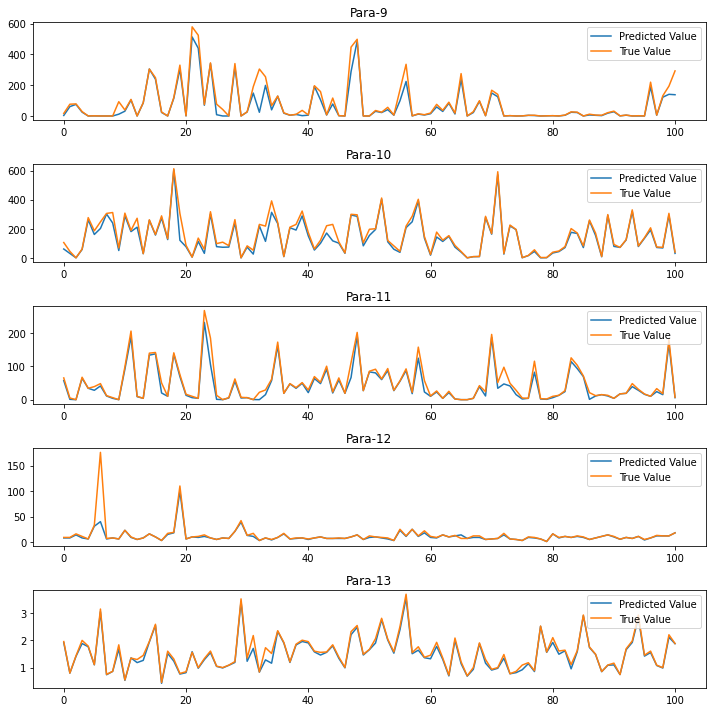

In [287]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
ax1 = plt.subplot(511)
ax1.plot(para9_pred)
ax1.plot(para9_act)
ax1.set_title("Para-9")
ax1.legend(["Predicted Value","True Value"])
ax2 = plt.subplot(512)
ax2.plot(para10_pred)
ax2.plot(para10_act)
ax2.set_title("Para-10")
ax2.legend(["Predicted Value","True Value"])

ax3 = plt.subplot(513)
ax3.plot(para11_pred)
ax3.plot(para11_act)
ax3.set_title("Para-11")
ax3.legend(["Predicted Value","True Value"])

ax4 = plt.subplot(514)
ax4.plot(para12_pred)
ax4.plot(para12_act)
ax4.set_title("Para-12")
ax4.legend(["Predicted Value","True Value"])

ax5 = plt.subplot(515)
ax5.plot(para13_pred)
ax5.plot(para13_act)
ax5.set_title("Para-13")
ax5.legend(["Predicted Value","True Value"])

plt.tight_layout()